# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [8]:
#import libraries
import os
import csv
#import csv ml library
import pandas as pd
#import numpy library
import numpy as np
#import matplotlib library
import matplotlib.pyplot as plt
#import seaborn library
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm

#load txt data 
test_data = pd.read_csv(r'C:\Users\admin\Downloads\exercise05_datacollection\exercise09_datacollection\stsa-test.csv', sep='\t', header=None)
train_data = pd.read_csv(r'C:\Users\admin\Downloads\exercise05_datacollection\exercise09_datacollection\stsa-test.csv', sep='\t', header=None)
print(test_data.head())
print(train_data.head())

                                                   0
0   0 no movement , no yuks , not much of anything .
1  0 a gob of drivel so sickly sweet , even the e...
2  0 gangs of new york is an unapologetic mess , ...
3  0 we never really feel involved with the story...
4          1 this is one of polanski 's best films .
                                                   0
0   0 no movement , no yuks , not much of anything .
1  0 a gob of drivel so sickly sweet , even the e...
2  0 gangs of new york is an unapologetic mess , ...
3  0 we never really feel involved with the story...
4          1 this is one of polanski 's best films .


In [9]:
print(test_data.describe())

                                                        0
count                                                1821
unique                                               1821
top     1 a thoughtful look at a painful incident that...
freq                                                    1


In [10]:
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1821 non-null   object
dtypes: object(1)
memory usage: 14.4+ KB
None


In [14]:
train_data, validation_data = train_test_split(train_data, test_size=0.2, random_state=1)
print(train_data.head())
print(validation_data.head())
print(train_data.shape)
print(validation_data.shape)
print(test_data.shape)
print(train_data.shape)
print(validation_data.shape)

                                                      0
1751  1 harsh , effective documentary on life in the...
890   0 could the country bears really be as bad as ...
1577  1 occasionally , in the course of reviewing ar...
774   1 what really surprises about wisegirls is its...
382   0 reggio 's trippy , ambitious downer can also...
                                                      0
1730  0 ` dragonfly ' is a movie about a bus wreck t...
979   0 unfortunately , the picture failed to captur...
292   0 the tug-of-war at the core of beijing bicycl...
434   1 de oliveira creates an emotionally rich , po...
1550  0 winds up feeling like lots of other quirky m...
(1456, 1)
(365, 1)
(1821, 1)
(1456, 1)
(365, 1)


In [15]:
#perform 10 fold cross validation while training the classifier. 
#cross validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

def cross_validation(model, X, y, k):
    #k-fold cross validation
    kf = KFold(n_splits=k, shuffle=True, random_state=1)
    #split the data into k folds
    scores = cross_val_score(model, X, y, cv=kf)
    #get the scores
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    #print the scores
    return scores.mean()

cross_validation(svm.SVC(kernel='linear'), train_data, train_data[0], 10)

Cross Validation Accuracy: nan (+/- nan)


C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 169, in fit
    X, y = self._validate_data(X, y, dtype=np.float64,
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 814, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fil

nan

In [19]:
#MultinominalNB model
from sklearn.naive_bayes import MultinomialNB
#create a MultinomialNB object
clf = MultinomialNB()

In [20]:
#SVM model
from sklearn.svm import SVC
#create a SVC object
clf = SVC()
print("SVM Model")

SVM Model


In [21]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
#create a KNeighborsClassifier object
clf = KNeighborsClassifier()
print("KNN Model")

KNN Model


In [22]:
#Desicion tree model
from sklearn.tree import DecisionTreeClassifier
#create a DecisionTreeClassifier object
clf = DecisionTreeClassifier()
print("Decision Tree Model")


Decision Tree Model


In [23]:
#Random Forest model
from sklearn.ensemble import RandomForestClassifier
#create a RandomForestClassifier object
clf = RandomForestClassifier()
print("Random Forest Model")

Random Forest Model


In [ ]:
#XGBoost model
from xgboost import XGBClassifier
#create a XGBClassifier object
clf = XGBClassifier()
print("XGBoost Model")

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


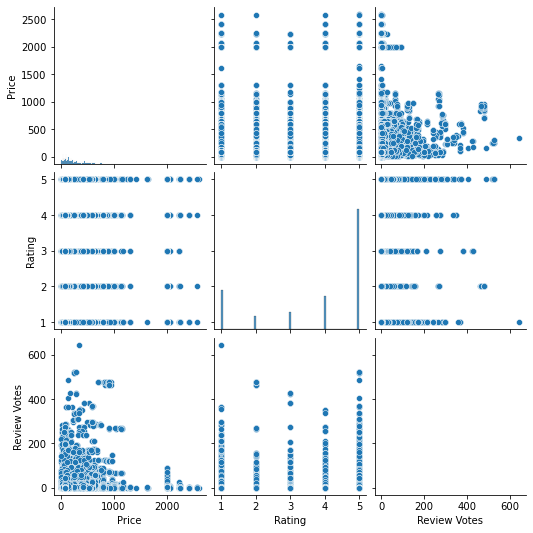

In [41]:
#Write your code here.
#load ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Load data
df = pd.read_csv(r'C:\Users\admin\Downloads\archive (8)/Amazon_Unlocked_Mobile.csv')
print(df.head())
#K means
from sklearn.cluster import KMeans
def kmeans_clustering(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
    kmeans_labels = kmeans.labels_
    kmeans_cluster_centers = kmeans.cluster_centers_
    kmeans_labels_unique = np.unique(kmeans_labels)
    return kmeans_labels, kmeans_labels_unique, kmeans_cluster_centers
#df plots
sns.pairplot(df)
plt.show()
#Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
def hierarchical_clustering(df, method='ward', metric='euclidean'):
    hierarchical_clustering = linkage(df, method=method, metric=metric)
    return hierarchical_clustering
#K means
from sklearn.cluster import KMeans
def kmeans_clustering(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(df)
    kmeans_labels = kmeans.labels_
    kmeans_cluster_centers = kmeans.cluster_centers_
    kmeans_labels_unique = np.unique(kmeans_labels)
    return kmeans_labels, kmeans_labels_unique, kmeans_cluster_centers
#DBScan
from sklearn.cluster import DBSCAN
def dbscan_clustering(df, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    dbscan_labels = dbscan.labels_
    dbscan_labels_unique = np.unique(dbscan_labels)
    return dbscan_labels, dbscan_labels_unique
#Hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram
def hierarchical_clustering(df, method='ward', metric='euclidean'):
    hierarchical_clustering = linkage(df, method=method, metric=metric)
    return hierarchical_clustering

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [2]:
#You can write you answer here. (No code needed)
The K-Means Clustering takes the input of dataset D and parameter k, 
and then divides a dataset D of n objects into k groups. 
This partition depends upon the similarity measure so 
that the resulting intra cluster similarity is high but the inter cluster similarity is low.
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. 
There are two types of hierarchical clustering, Agglomerative and Divisive.
The main concept of DBSCAN algorithm is to locate regions of high density that are separated 
from one another by regions of low density.
DBSCAN can identify clusters in a large spatial dataset by looking at the local density of corresponding elements.

